#### Dataset

In [2]:
# toxic-comments.csv 
# https://mitu.co.in/dataset

In [42]:
import pandas as pd 
import re

#### Load the dataset

In [5]:
df = pd.read_csv('datasets/toxic-comments.csv')

In [6]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
df.shape

(159571, 8)

In [8]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [9]:
# define target variable
toxicities = ['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']

In [11]:
comments = df.sum(numeric_only=True)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

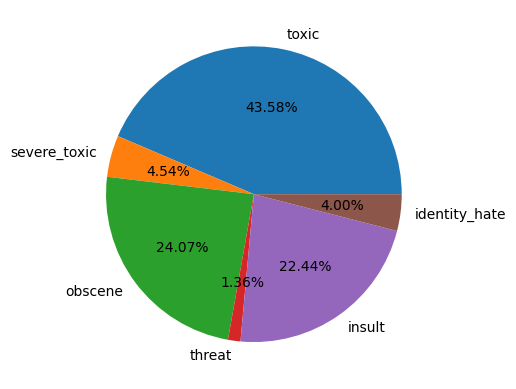

In [13]:
plt.pie(comments.values, labels=comments.index, autopct='%2.2f%%');

In [15]:
total = df.sum(axis=1, numeric_only=True)

In [24]:
newdf = pd.DataFrame({
    'neutral' : [sum(total==0)],
    'toxic' : [sum(total!=0)]
})

In [32]:
newdf

,neutral,toxic
0,143346,16225


In [27]:
newsr = pd.Series([neutral,toxic], index=['neutral','toxic'])

In [29]:
newsr

neutral    143346
toxic       16225
dtype: int64

<BarContainer object of 2 artists>

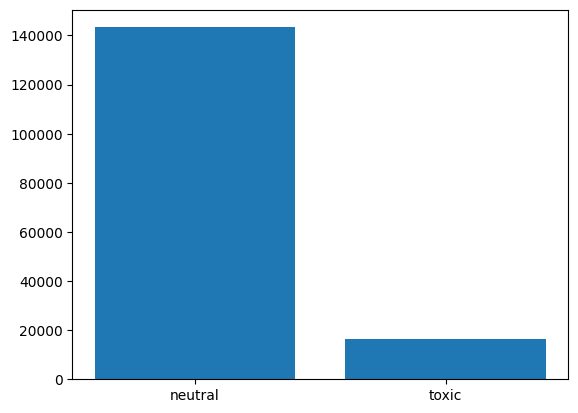

In [34]:
plt.bar(newsr.index, newsr.values)

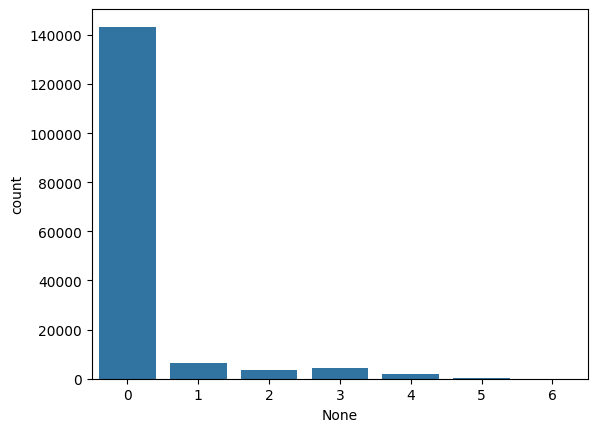

In [35]:
sns.countplot(x = total);

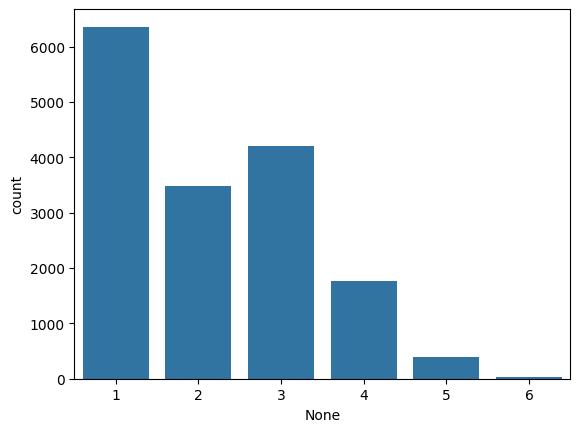

In [39]:
only_toxic = total[total!=0]
sns.countplot(x = only_toxic);

In [40]:
pd.Series(only_toxic).value_counts()

1    6360
3    4209
2    3480
4    1760
5     385
6      31
Name: count, dtype: int64

#### Data Cleaning

In [55]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9]+',' ', text)
    return text

In [56]:
text = 'Hello! How are you?'

In [57]:
clean_text(text)

'hello how are you '

In [58]:
# input data
comment_text = df['comment_text'].apply(clean_text)

In [59]:
comment_text

0         explanation why the edits made under my userna...
1         d aww he matches this background colour i m se...
2         hey man i m really not trying to edit war it s...
3          more i can t make any real suggestions on imp...
4         you sir are my hero any chance you remember wh...
                                ...                        
159566     and for the second time of asking when your v...
159567    you should be ashamed of yourself that is a ho...
159568    spitzer umm theres no actual article for prost...
159569    and it looks like it was actually you who put ...
159570     and i really don t think you understand i cam...
Name: comment_text, Length: 159571, dtype: object

In [63]:
labels = df[toxicities].values

In [64]:
labels

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

#### Prepare the input data

In [66]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, GRU
from sklearn.model_selection import train_test_split

In [70]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(comment_text)
sequences = tokenizer.texts_to_sequences(comment_text)
padded = pad_sequences(sequences, maxlen=200, padding='post')

In [71]:
padded.shape

(159571, 200)

In [73]:
padded[0]

array([ 678,   77,    1,  130,  133,  181,   31,  668, 4472, 1088,   87,
        331,   49, 2224,   22,   54,   15,   62, 2738,  150,    3, 2924,
         36,  121, 1189, 2786,    5,   47,   60,   22,  245,    1,  361,
         33,    1,   38,   30,  146,    3,   70, 3359,   90, 3027, 4539,
       2252,  972,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

#### Cross Validation

In [79]:
x_train, x_test, y_train, y_test = train_test_split(
    padded, labels, random_state=0, test_size=0.2)

In [80]:
x_train.shape, y_train.shape

((127656, 200), (127656, 6))

In [81]:
x_test.shape, y_test.shape

((31915, 200), (31915, 6))

#### Build the model

In [87]:
model = Sequential()

model.add(Embedding(5000, 100, input_length = 200))
model.add(GRU(64))
model.add(Dense(6,activation='sigmoid'))

In [88]:
model.compile(loss='binary_crossentropy', optimizer='adam', 
             metrics=['accuracy'])

#### Train the model

In [90]:
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

Epoch 1/3
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 314s 78ms/step - accuracy: 0.9611 - loss: 0.0996 - val_accuracy: 0.9912 - val_loss: 0.0518
Epoch 2/3
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 324s 81ms/step - accuracy: 0.9793 - loss: 0.0470 - val_accuracy: 0.9900 - val_loss: 0.0496
Epoch 3/3
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 323s 81ms/step - accuracy: 0.9652 - loss: 0.0421 - val_accuracy: 0.9858 - val_loss: 0.0499


In [99]:
sample1 = 'You are stupid. No one cares about your opinion. Just shut up.'
sample2 = 'You are waste of time. World is better without you.'
sample3 = "Your life will be so beautiful with her."

In [132]:
def predict(new_comment):
    cleaned = clean_text(new_comment)
    new_seq = tokenizer.texts_to_sequences([cleaned])
    new_pad = pad_sequences(new_seq, maxlen=200)
    prediction = model.predict(new_pad, verbose=False)
    for i in range(len(prediction[0])):
        if prediction[0][i] > 0.5:
            print(toxicities[i])
    return prediction

In [133]:
predict(sample1)

toxic


array([[0.74305475, 0.01078106, 0.07762653, 0.00406577, 0.17223226,
        0.02064147]], dtype=float32)

In [134]:
predict(sample2)

array([[0.19518588, 0.01225138, 0.03840066, 0.00249518, 0.04272842,
        0.00777878]], dtype=float32)

In [135]:
predict(sample3)

array([[0.22877745, 0.00657662, 0.04369505, 0.00229291, 0.05233707,
        0.00760008]], dtype=float32)